In [59]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
df = pd.read_csv('churn_rate_prediction.csv')

In [60]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [61]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [62]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes == 'object') & (feature != 'y'))]
categorical_features

['customer_id',
 'Name',
 'gender',
 'security_no',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'referral_id',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'avg_frequency_login_days',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [63]:
for values in categorical_features:
    if(len(df[values].unique()) < 7):
        print(values,':',df[values].unique(), len(df[values].unique()))
    else:
        print(values, ':', len(df[values].unique()))

customer_id : 36992
Name : 36992
gender : ['F' 'M' 'Unknown'] 3
security_no : 36992
region_category : ['Village' 'City' 'Town' nan] 4
membership_category : ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership'] 6
joining_date : 1096
joined_through_referral : ['No' '?' 'Yes'] 3
referral_id : 11359
preferred_offer_types : ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan] 4
medium_of_operation : ['?' 'Desktop' 'Smartphone' 'Both'] 4
internet_option : ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic'] 3
last_visit_time : 30101
avg_frequency_login_days : 1654
used_special_discount : ['Yes' 'No'] 2
offer_application_preference : ['Yes' 'No'] 2
past_complaint : ['No' 'Yes'] 2
complaint_status : ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available'] 5
feedback : 9


In [64]:
col_fix=['customer_id', 'Name', 'gender', 'security_no','joining_date','referral_id' ,'perferred', 'last_visit_time','avg_frequency_login_days' ,'region_category', 'joined_through_referral', 'preferred_offer_types','medium_of_operation']

In [65]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
numerical_features

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'points_in_wallet',
 'churn_risk_score']

In [66]:
for values in numerical_features:
    if(len(df[values].unique()) < 7):
        print(values,':',df[values].unique(), len(df[values].unique()))
    else:
        print(values, ':', len(df[values].unique()))

age : 55
days_since_last_login : 27
avg_time_spent : 25961
avg_transaction_value : 36894
points_in_wallet : 23700
churn_risk_score : [ 2  1  5  3  4 -1] 6


In [67]:
df['churn_risk_score'].value_counts()

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64

In [68]:
df.drop(["customer_id", "security_no", "Name"], axis=1, inplace=True)

In [69]:
df.loc[df['joined_through_referral'] == '?'].shape

(5438, 22)

In [70]:
columns_with_question_mark = df.columns[df.isin(['?', 'Error']).any()]
columns_with_question_mark

Index(['joined_through_referral', 'medium_of_operation',
       'avg_frequency_login_days'],
      dtype='object')

In [71]:
df.loc[df['joined_through_referral'] == '?', 'joined_through_referral'] = df.loc[df['joined_through_referral'] == '?', 'referral_id'].apply(lambda x: 'No' if x == 'xxxxxxxx' else 'Yes')
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,Yes,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


# Xử lý medium_of_operation

In [72]:
df.loc[df['medium_of_operation']=='?'].shape

(5393, 22)

In [73]:
# Thống kê crosstab giữa 'medium_of_operation' và 'internet_option'
crosstab_result = pd.crosstab(df['medium_of_operation'], df['internet_option'])
print(crosstab_result)

internet_option      Fiber_Optic  Mobile_Data  Wi-Fi
medium_of_operation                                 
?                           1741         1849   1803
Both                        1252         1262   1296
Desktop                     4572         4625   4716
Smartphone                  4671         4607   4598


Ta thấy giữa internet_option và medium_of_operation không thể hiện logic nào. Nên sử dụng phương pháp thay thế '?' bằng ngẫu nhiên 'Desktop', 'Both', 'Smartphone'theo tỷ lệ mà bộ dữ liệu đang có

In [74]:
# Tỉ lệ các giá trị thay thế
proportions = [1252, 4572, 4671]
values = ['Desktop', 'Both', 'Smartphone']

# Thay thế giá trị '?' bằng các giá trị ngẫu nhiên theo tỷ lệ
replacements = np.random.choice(values, size=df['medium_of_operation'].eq('?').sum(), p=proportions/np.sum(proportions))
df.loc[df['medium_of_operation'] == '?', 'medium_of_operation'] = replacements

In [75]:
# Thống kê crosstab giữa 'medium_of_operation' và 'internet_option'
crosstab_result = pd.crosstab(df['medium_of_operation'], df['internet_option'])
print(crosstab_result)

internet_option      Fiber_Optic  Mobile_Data  Wi-Fi
medium_of_operation                                 
Both                        1990         2082   2059
Desktop                     4819         4845   4939
Smartphone                  5427         5416   5415


Nhận xét: Dữ liệu vẫn giữ được tỷ lệ

# Xử lý dữ liệu số


In [76]:
df.loc[df['avg_frequency_login_days']=='Error'].shape

(3522, 22)

In [77]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace('Error', np.nan).astype(float)
df['avg_frequency_login_days'].describe()

count    33470.000000
mean        15.976715
std          9.215858
min        -43.652702
25%          9.000000
50%         16.000000
75%         23.000000
max         73.061995
Name: avg_frequency_login_days, dtype: float64

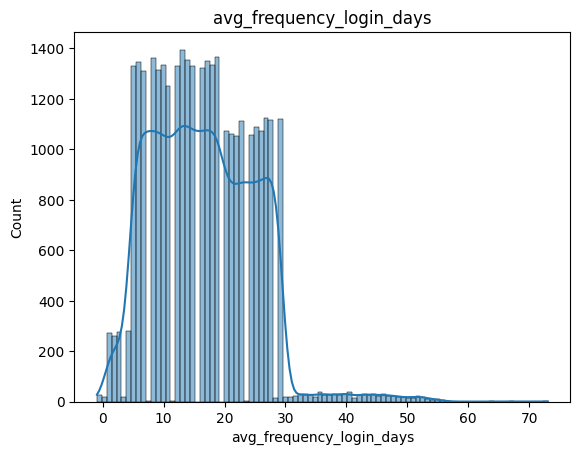

In [78]:
data = df.loc[df['avg_frequency_login_days'] > -1]['avg_frequency_login_days']
sns.histplot(data, kde=True)
plt.xlabel('avg_frequency_login_days')
plt.ylabel('Count')
plt.title('avg_frequency_login_days')
plt.show()

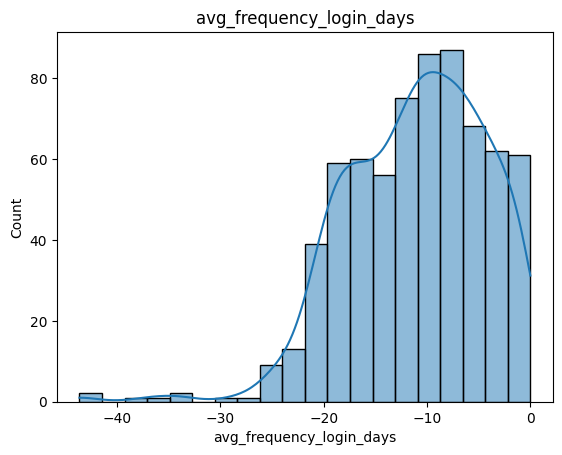

In [79]:
data = df.loc[df['avg_frequency_login_days'] <0]['avg_frequency_login_days']
sns.histplot(data, kde=True)
plt.xlabel('avg_frequency_login_days')
plt.ylabel('Count')
plt.title('avg_frequency_login_days')
plt.show()

In [80]:
median_value = df.loc[df['avg_frequency_login_days'] >= 0, 'avg_frequency_login_days'].median()
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].mask(df['avg_frequency_login_days'] < 0, median_value)
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].fillna(median_value)

In [81]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,16.477389,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,7.894634,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,0.009208,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,11.000000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,16.000000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,5.000000


Các điểm bất thường:

    1. Dữ liệu âm của các cột 'days_since_last_login', 'avg_time_spent','points_in_wallet'

Xử lý giá trị âm cột 'days_since_last_login'

In [82]:
df['days_since_last_login'].value_counts()

days_since_last_login
 12     2380
 13     2373
 14     2307
 15     2278
 11     2262
 10     2091
 16     2068
-999    1999
 9      1863
 17     1747
 8      1571
 18     1444
 7      1442
 19     1308
 6      1257
 5      1234
 20     1184
 21     1015
 4       998
 22      895
 3       852
 23      727
 2       613
 24      471
 1       328
 25      203
 26       82
Name: count, dtype: int64

Xét trên tập dữ liệu ta thấy cột 'days_since_last_login'
        
        Ta có thể thấy giá trị -999 chiếm 1999 dòng, đồng thời ứng với mỗi dòng dữ liệu đều tồn tại giá trị tại các cột như 'last_visit_time','avg_time_spent',... Nên ta có thể khẳng định đây không phải giá trị đại diện cho việc khách hàng chưa đăng nhập lần nào. Mà có thể các giá trị này là các giá trị bị thiếu (missing values)

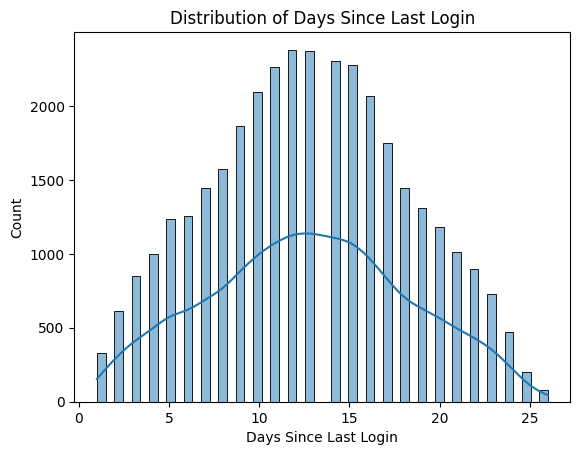

In [83]:
data = df.loc[df['days_since_last_login'] > -1]['days_since_last_login']
sns.histplot(data, kde=True)
plt.xlabel('Days Since Last Login')
plt.ylabel('Count')
plt.title('Distribution of Days Since Last Login')
plt.show()

Nhận xét: dữ liệu không có các giá trị ngoại lệ (outliers) và phân phối dữ liệu xấp xỉ đối xứng. 

==> Sử dụng giá trị mean() thay thế cho missing values

In [84]:
mean_value = df.loc[df['days_since_last_login'] > -1]['days_since_last_login'].mean()
df['days_since_last_login'] = df['days_since_last_login'].replace(-999, mean_value)

### Xử lý giá trị âm cột 'avg_time_spent'

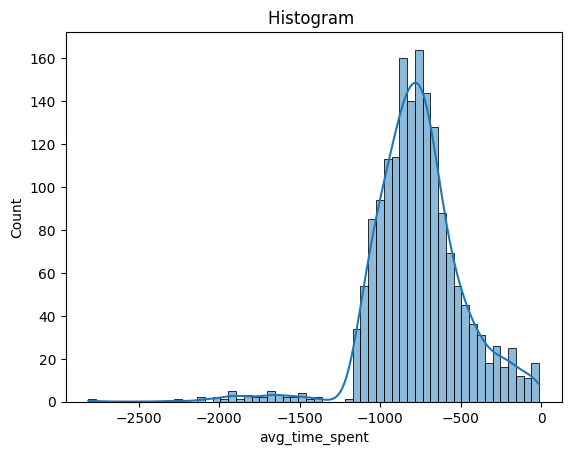

In [85]:
sns.histplot( df.loc[df['avg_time_spent']<0]['avg_time_spent'], kde=True)
plt.xlabel('avg_time_spent')
plt.ylabel('Count')
plt.title('Histogram ')
plt.show()

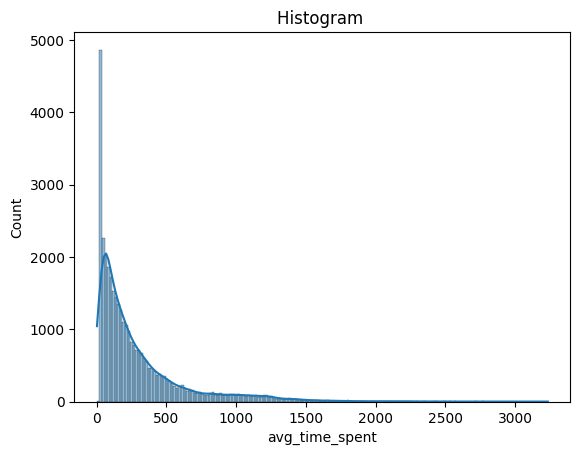

In [86]:
sns.histplot( df.loc[df['avg_time_spent'] >= 0]['avg_time_spent'], kde=True)
plt.xlabel('avg_time_spent')
plt.ylabel('Count')
plt.title('Histogram ')
plt.show()

Nhận xét:  dữ liệu chứa các giá trị ngoại lệ (outliers) và phân phối dữ liệu lệch.


==> Sử dụng median() thay thế

In [87]:
median_value = df.loc[df['avg_time_spent'] >= 0, 'avg_time_spent'].median()
df['avg_time_spent'] = df['avg_time_spent'].mask(df['avg_time_spent'] < 0, median_value)

In [88]:
df.loc[df['avg_time_spent'] >0 ].describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,12.758552,287.241508,29271.194003,16.477389,686.882199,3.463397
std,15.867412,5.419937,325.101281,19444.806226,7.894634,194.063624,1.409661
min,10.000000,1.000000,1.837399,800.460000,0.009208,-760.661236,-1.000000
25%,23.000000,9.000000,75.620000,14177.540000,11.000000,616.150000,3.000000
50%,37.000000,12.758552,174.180000,27554.485000,16.000000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,5.000000


### Xử lý giá trị âm cột 'points_in_wallet' và giá trị NaN 

Kiểm tra giá trị NaN trong cột points_in_wallet

In [89]:
df['points_in_wallet'].isnull().value_counts()

points_in_wallet
False    33549
True      3443
Name: count, dtype: int64

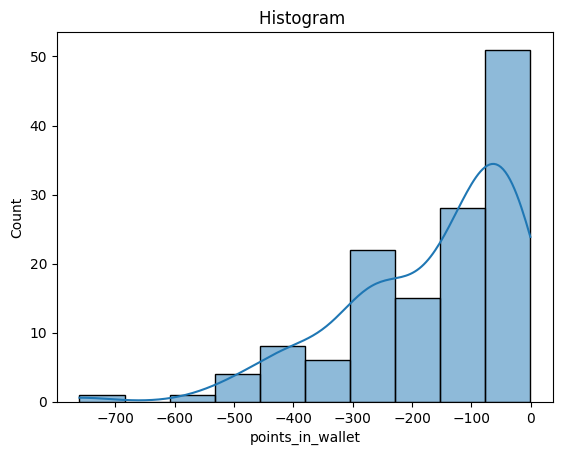

In [90]:
sns.histplot( df.loc[df['points_in_wallet']<0]['points_in_wallet'], kde=True)
plt.xlabel('points_in_wallet')
plt.ylabel('Count')
plt.title('Histogram ')
plt.show()

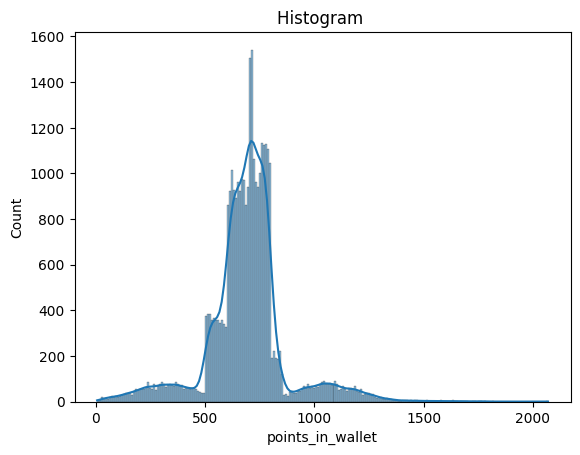

In [91]:
sns.histplot( df.loc[df['points_in_wallet']>=0]['points_in_wallet'], kde=True)
plt.xlabel('points_in_wallet')
plt.ylabel('Count')
plt.title('Histogram ')
plt.show()

In [92]:
median_value = df.loc[df['points_in_wallet'] >= 0, 'points_in_wallet'].median()
df['points_in_wallet'] = df['points_in_wallet'].mask(df['points_in_wallet'] < 0, median_value)
df['points_in_wallet'] = df['points_in_wallet'].fillna(median_value)

In [93]:
df.isnull().sum()

age                                0
gender                             0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [94]:
df['region_category'].isna().value_counts()

region_category
False    31564
True      5428
Name: count, dtype: int64

Có 5428 giá trị NaN trong cột region_category

In [95]:
def fillNan(df, col, value):
    df[col].fillna(value, inplace=True)
fillNan(df, 'region_category', df['region_category'].mode()[0])
df['region_category'].isna().value_counts()

region_category
False    36992
Name: count, dtype: int64

In [96]:
df.drop('referral_id', axis=1, inplace=True)

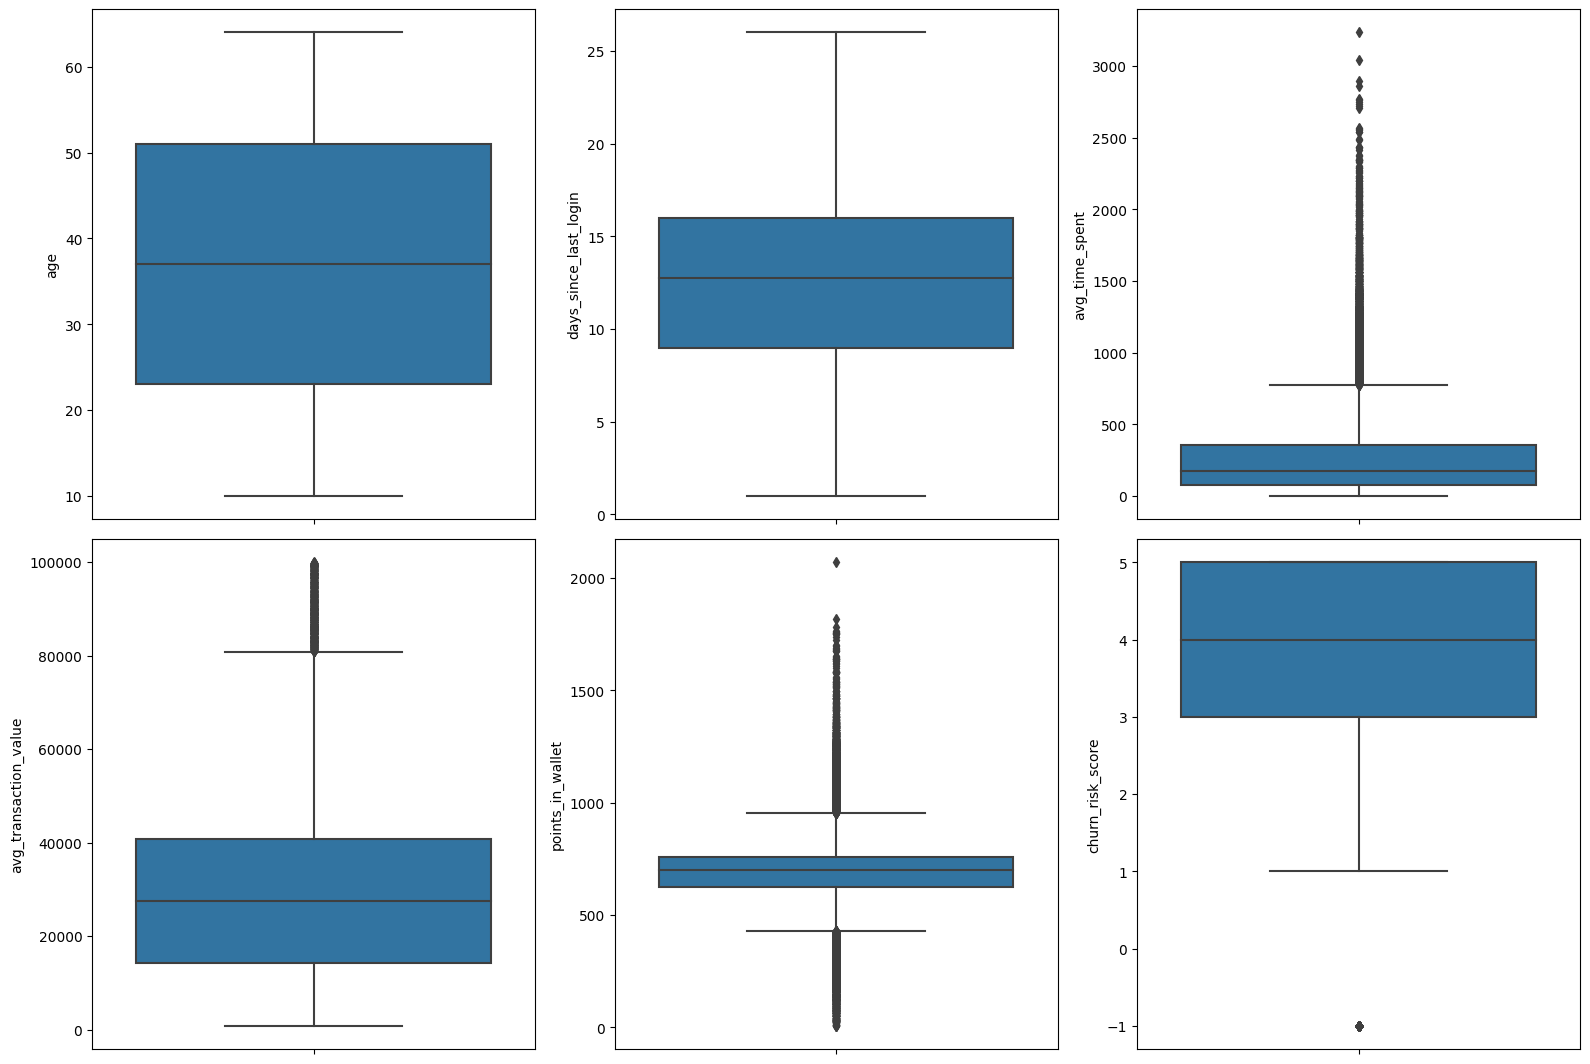

In [97]:
fig = plt.figure(figsize=(16,16))
for i in range(len(numerical_features)):
    fig.add_subplot(3, 3, i+1)
    sns.boxplot(y=df[numerical_features[i]])
plt.tight_layout()
plt.show()

In [98]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

filtered_df = df.copy()
for column in numerical_features:
    filtered_df = remove_outliers_iqr(filtered_df, column)
df = filtered_df

In [99]:
df.isnull().sum()

age                               0
gender                            0
region_category                   0
membership_category               0
joining_date                      0
joined_through_referral           0
preferred_offer_types           202
medium_of_operation               0
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
churn_risk_score                  0
dtype: int64

In [100]:
len(df)

26977

In [101]:
from datetime import datetime
def time_to_seconds(time_str):
    time_obj = datetime.strptime(time_str, "%H:%M:%S")
    total_seconds = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
    return total_seconds
df["last_visit_time"] = df["last_visit_time"].apply(time_to_seconds).fillna(0).astype(int)


df['joining_date'] = pd.to_datetime(df['joining_date'])
df['days_since_joined'] = df['joining_date'].apply(lambda x:(pd.Timestamp('today') - x).days)
df.drop(['joining_date'], inplace=True, axis=1)

<Axes: >

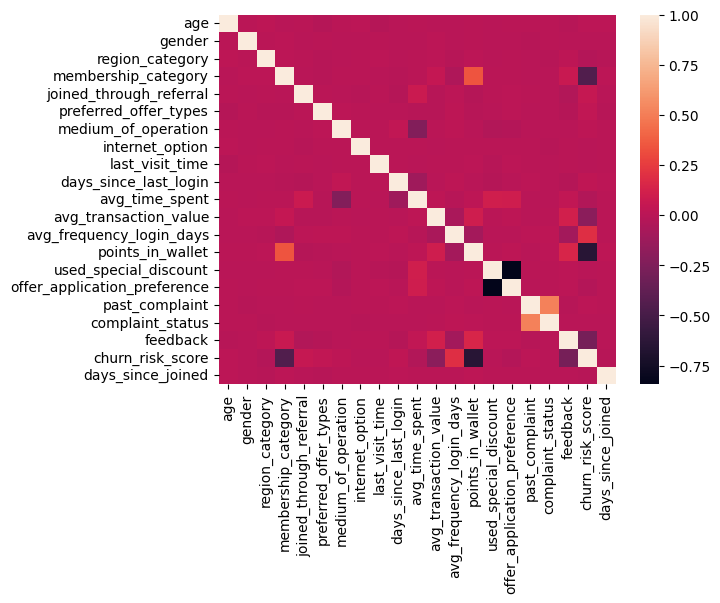

In [102]:
# Heatmap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Chuyển đổi giới tính thành số
    gender_encoder = LabelEncoder()
    df['gender'] = gender_encoder.fit_transform(df['gender'])

    # Chuyển đổi vùng miền thành số
    region_encoder = LabelEncoder()
    df['region_category'] = region_encoder.fit_transform(df['region_category'])

    # Chuyển đổi loại thành viên thành số
    membership_encoder = LabelEncoder()
    df['membership_category'] = membership_encoder.fit_transform(df['membership_category'])

    # Chuyển đổi loại ưu đãi ưa thích thành số
    offer_encoder = LabelEncoder()
    df['preferred_offer_types'] = offer_encoder.fit_transform(df['preferred_offer_types'])

    # Chuyển đổi phương thức sử dụng thành số
    medium_encoder = LabelEncoder()
    df['medium_of_operation'] = medium_encoder.fit_transform(df['medium_of_operation'])

    # Chuyển đổi lựa chọn kết nối Internet thành số
    internet_encoder = LabelEncoder()
    df['internet_option'] = internet_encoder.fit_transform(df['internet_option'])

    #
    used_special_discount = LabelEncoder()
    df['used_special_discount'] = used_special_discount.fit_transform(df['used_special_discount'])
    
    #
    past_complaint = LabelEncoder()
    df['past_complaint'] = past_complaint.fit_transform(df['past_complaint'])
    
    #
    complaint_status = LabelEncoder()
    df['complaint_status'] = complaint_status.fit_transform(df['complaint_status'])
    
    #
    feedback = LabelEncoder()
    df['feedback'] = feedback.fit_transform(df['feedback'])
    
    #
    offer_application_preference = LabelEncoder()
    df['offer_application_preference'] = feedback.fit_transform(df['offer_application_preference'])
    
    #
    joined_through_referral = LabelEncoder()
    df['joined_through_referral'] = joined_through_referral.fit_transform(df['joined_through_referral'])
    
   
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [103]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    feature_names = df.columns.tolist()
    feature_names.remove("churn_risk_score")

    X = df[feature_names].values
    y = df.churn_risk_score.values

    return X, y
X, y = prepare_X_y(df)

In [104]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 223
TRAIN_SIZE = 0.3

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [110]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Xây dựng pipeline với StandardScaler và mô hình SVM
pipeline = make_pipeline(StandardScaler(), SVC())
# Tạo một dict chứa các giá trị để tinh chỉnh
param_grid = {
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__C': [0.1, 1.0, 10.0],
    'svc__gamma': ['scale', 'auto']
}

# Tạo GridSearchCV để tìm kiếm các tham số tốt nhất
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Huấn luyện mô hình với tìm kiếm lưới
grid_search.fit(trainX, trainY)

# Lấy mô hình tốt nhất từ tìm kiếm lưới
best_model = grid_search.best_estimator_

# Dự đoán nhãn cho dữ liệu kiểm tra
predY = best_model.predict(testX)

# Đánh giá mô hình
accuracy = accuracy_score(testY, predY)
print('Accuracy:', accuracy)
akurasiSVM = accuracy_score(testY, predY)
print('Akurasi model SVM', "{:.2f}".format(akurasiSVM * 100),'%')
print(f"Report Metrics SVM \n {classification_report(testY, predY)}")

print(f"Confuction Matrix SVM ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(testY, predY), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

In [109]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Chuẩn bị dữ liệu
# X_train, X_test: Dữ liệu đầu vào cho huấn luyện và kiểm tra
# y_train, y_test: Nhãn tương ứng cho huấn luyện và kiểm tra

# Xây dựng pipeline với StandardScaler và mô hình SVM
pipeline = make_pipeline(StandardScaler(), SVC(kernel= 'linear', C=1.0, gamma='scale'))

# Huấn luyện mô hình
pipeline.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu kiểm tra
predY = pipeline.predict(testX)

# Đánh giá mô hình
accuracy = accuracy_score(testY, predY)
print('Accuracy:', accuracy)
akurasiSVM = accuracy_score(testY, predY)
print('Akurasi model SVM', "{:.2f}".format(akurasiSVM * 100),'%')
print(f"Report Metrics SVM \n {classification_report(testY, predY)}")

print(f"Confuction Matrix SVM ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(testY, predY), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()


In [108]:
# from sklearn.metrics import classification_report
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import confusion_matrix

# def build_model(X, y):
#     """
#     Design your model and train it (including your best params)
#     :param X: feature matrix
#     :param y: target
#     :return: a model
#     """

#     # Todo: Input your scaler and logistic model into pipeline
#     # model = make_pipeline(DecisionTreeClassifier(random_state=0))
#     # # Todo: fit your model with X, y
#     # model.fit(X, y)
#     dtree = DecisionTreeClassifier(max_depth=15, min_samples_split=10, min_samples_leaf=12)
#     dtree.fit(X, y)

#     return model

# def calculate_performance(y_true, y_pred):
#     """

#     :param y_true: ground truth values
#     :param y_pred: predictions
#     :return:
#     """
#     # Todo: return your error value like accuracy, f1score, ...
#     # precision = precision_score(y_true, y_pred)
#     recall = recall_score(y_true, y_pred)
#     accuracy = accuracy_score(y_true, y_pred)
#     F1 = f1_score(y_true, y_pred)
#     print("precision", precision)
#     print("recall", recall)
#     print("accuracy", accuracy)
#     print("F1", F1)

#     # Todo: Only choose one of them as your score for the question 7
#     main_score = F1
#     return main_score





# # Build the decision tree model and train it on the training data
# model = build_model(trainX, trainY)

# # Use the model to make predictions on the test data
# predY = model.predict(testX)

# # Calculate model performance using the test data
# akurasiSVM = accuracy_score(testY, predY)
# print('Akurasi model SVM', "{:.2f}".format(akurasiSVM * 100),'%')
# print(f"Report Metrics SVM \n {classification_report(testY, predY)}")

# print(f"Confuction Matrix SVM ")
# ax= plt.subplot()
# sns.heatmap(confusion_matrix(testY, predY), annot=True, ax = ax, fmt = 'g', cmap='Greens')
# ax.set_xlabel('Predicted label')
# ax.set_ylabel('Actual label')
# plt.show()
